Project Description : The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Dataset: The dataset is from Kaggle


Attribute Information
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)


Project Objective : Understand the Dataset & cleanup (if required).
Build classification models to predict predict the quality of red wines based on various chemical properties and attributes
Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms, choose the best model with highest accuracy.

Bussinness Implication:
    Enhanced product Quality
    Market Competitive edge over others company
    Improved overall operational efficiiency

Steps to Follow for the Project: The dataset contains 12 features and 1599 samples
Below are the steps to follow for the project:

1 :Importing required Libariries
2: Importing the Dataset 
3: Data Cleaning and transforming
4: Data EDA, Exploratory Data analysis to see trends, pattern and relationship
5: Feature Selection/Extraction- to identify the most relevant features
6: Data Preprocessing
7: Predictive Modelling using various algorithms
8: Comparing the models and Model Evaluation
9: Project Outcomes & Conclusion

# 1: Importing required Libraries

In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import datasets,linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import  roc_curve, roc_auc_score

# 2: Importing required Dataset¶

In [3]:
# Importing the dataset
wine_data=pd.read_csv('winequality-red.csv')
wine_data.head(20)  # displaying first 20 records from the dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


# 3: Data Cleaning and Transfroming

In [4]:
wine_data.shape # to determine the dimension of the dataset

(1599, 12)

In [5]:
#Checking the dtypes of all the columns
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


We can infer that All features are numerical (11 floating value and one integer value) and no categorical features

In [6]:
# Checking for missing values
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We can infer that there is no missing values and the dataset is appropriate for the prediction

In [7]:
wine_data.describe() # Performing Descriptive Statistical Analysis on Numerical Features

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
# Checking for duplicate values
wine_data.duplicated()
# displaying the number of duplicated values in the dataset
wine_data[wine_data.duplicated()==True].shape[0]

240

We can infer that there is 240 duplicated values in the dataset and this can affect the integrity of the dataset, hence we are going to drop the duplicated values

In [9]:
# Dropping the duplicated values
wine_data.drop_duplicates(inplace=True)

In [11]:
# Confirming if the duplicated values have been dropped
wine_data.duplicated().any()

False

We can infer that there is no more duplicated values

# 4: Data EDA, Exploratory Data analysis to see trends, pattern and relationship

In [12]:
# Determine the unique values for wine Quality
wine_quality = wine_data["quality"].value_counts()
wine_quality

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

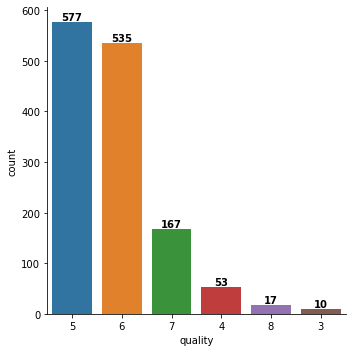

In [13]:
sns.catplot(x = 'quality', data = wine_data , kind = 'count',margin_titles = True,order=wine_quality.index) # plotting the quality of wine
#add value labels to the bar chat
for index,value in enumerate(wine_quality.values):
    plt.text(index,value,value, ha="center", va="bottom",fontweight="black")

We can infer that wine quality of 5 has the highest frequency of 577 and wine quality  of 3 has the lowest frequency of 10
Most of the wines have quality of 5 or 6

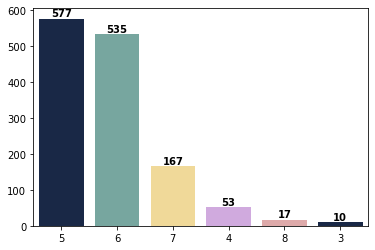

In [14]:
sns.barplot(x=wine_quality.index, y=wine_quality.values, order=wine_quality.index, palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
# calling the function to add value labels
for index,value in enumerate(wine_quality.values):
    plt.text(index,value,value, ha="center", va="bottom",fontweight="black")

In [15]:
# converting it to datafram
cols=wine_data.drop('quality',axis=1)
cols=pd.DataFrame(cols)
cols
#column_names = len(cols.columns)
#print(column_names)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [16]:
# function to plot other features against Wine Quality
def features_plot(column):
    plt.figure(figsize=(10,10))
    plt.subplot(2,1,1)
    col_name=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
    sns.barplot(x="quality",y=column, data=wine_data)
    plt.title(f"{column.title()} vs Quality Analysis",fontweight="black",size=25,pad=10,)
    col_values = wine_data[column].value_counts()
    plt.tight_layout()
  

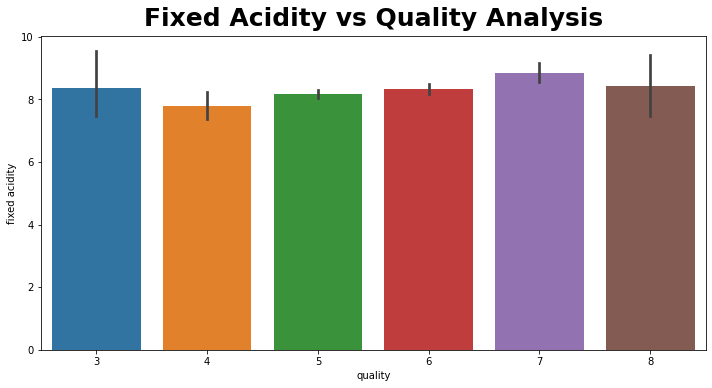

In [17]:
features_plot("fixed acidity") # Calling function features_plot to plot fixed acidity against wine quality

There is no correlation or defined relationship between quality and Fixed acidity.

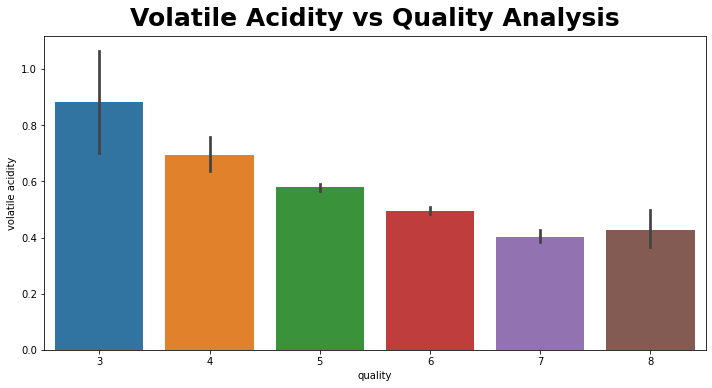

In [18]:
features_plot("volatile acidity") # Calling function features_plot to plot  Volatile acidity against wine quality

The higher the Volatile acidity, the lower the quality of the wine

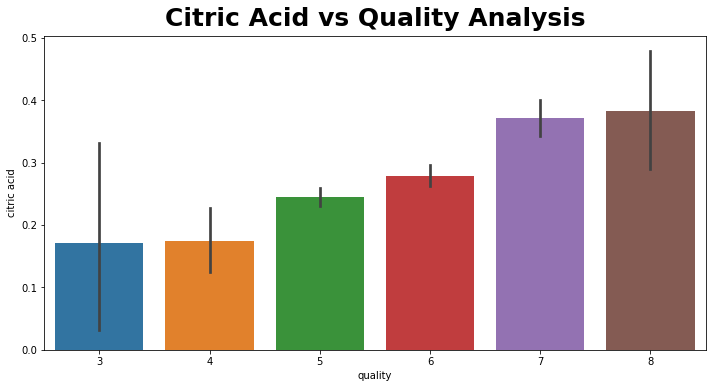

In [19]:
features_plot("citric acid") # Calling function features_plot to plot  citric acid against wine quality

The lower the citric acid, the higher the quality of the wine

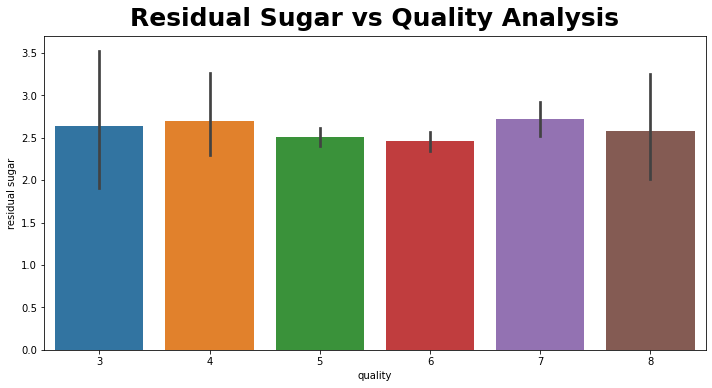

In [20]:
features_plot("residual sugar") # Calling function features_plot to plot Residual Sugar against wine quality

There is no correlation or defined relationship between quality and Fixed acidity.

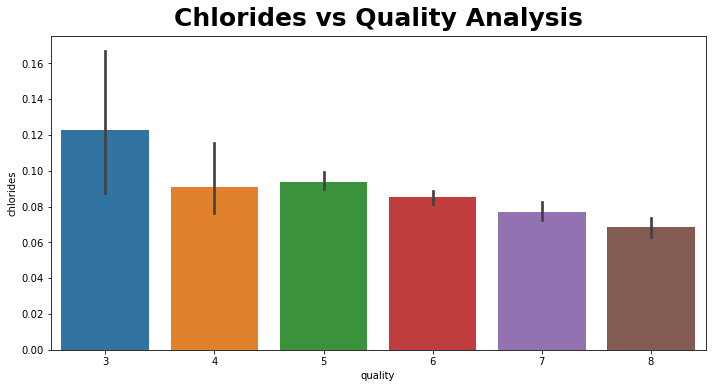

In [21]:
features_plot("chlorides") # Calling function features_plot to plot  Chlorides against wine quality

The higher the chlorides, the lower the quality of the wine

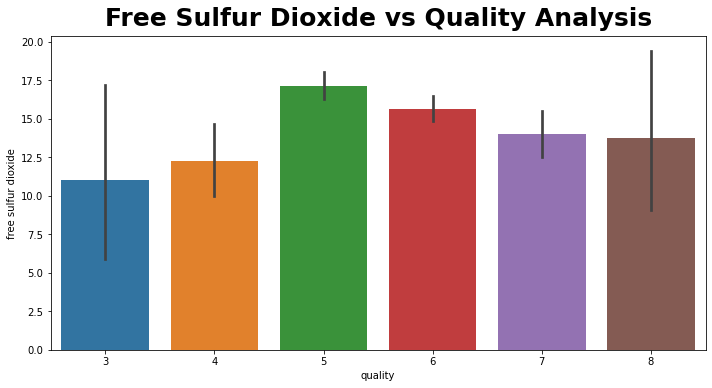

In [22]:
features_plot("free sulfur dioxide") # Calling function features_plot to plot Free sulfur dioxide against wine quality

The quality relationship with sulfur dioxide is fluctuating.

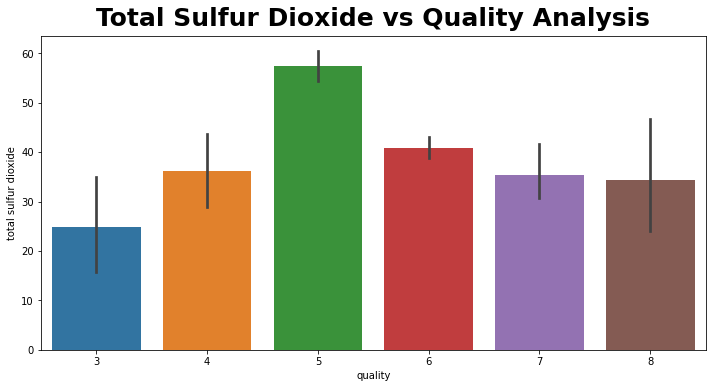

In [23]:
features_plot("total sulfur dioxide") # Calling function features_plot to plot total sulfur dioxide against wine quality

The quality relationship with sulfur dioxide is fluctuating.

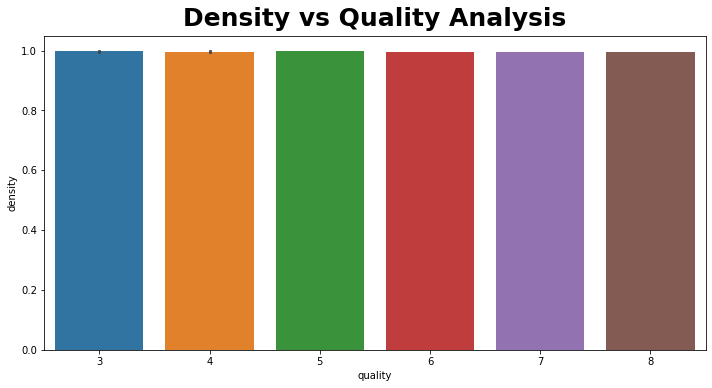

In [24]:
features_plot("density") # Calling function features_plot to plot  density against wine quality

There is no correlation or defined relationship between quality and Density.

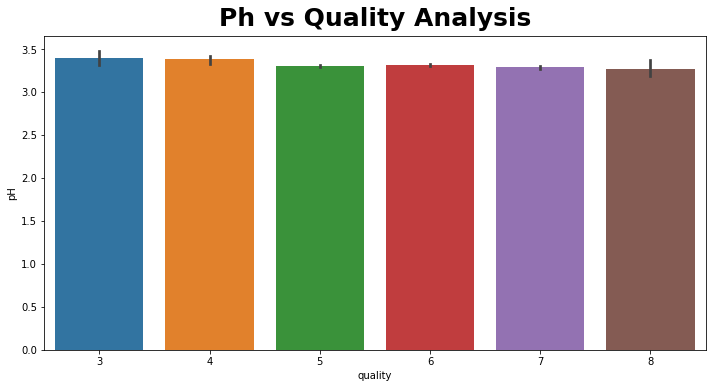

In [25]:
features_plot("pH") # Calling function features_plot to plot ph against wine quality

There is no correlation or defined relationship between quality and PH.

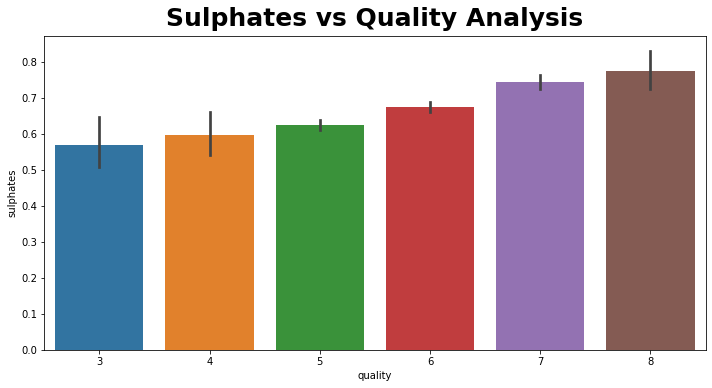

In [24]:
features_plot("sulphates") # Calling function features_plot to plot sulphates against wine quality

The higher the sulphate, the higher the quality of the wine

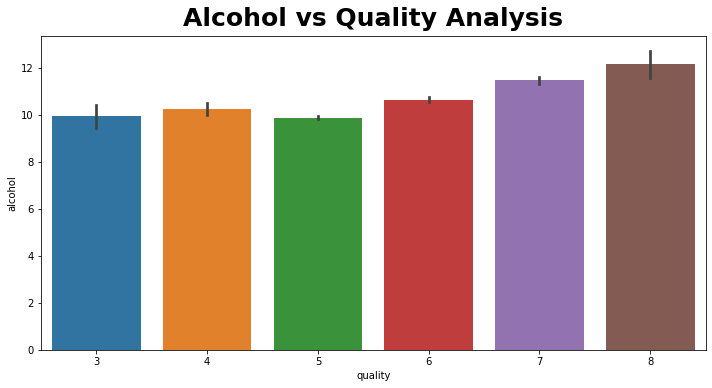

In [25]:
features_plot("alcohol") # Calling function features_plot to plot alcohol against wine quality

The hihger the alcohol, the higher the quality of the wine

# 5: Feature Selection/Extraction- to identify the most relevant features

C:\Users\ayoba\AppData\Local\Temp\ipykernel_33280\3408033909.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(wine_data.corr(), dtype=np.bool)


<AxesSubplot:>

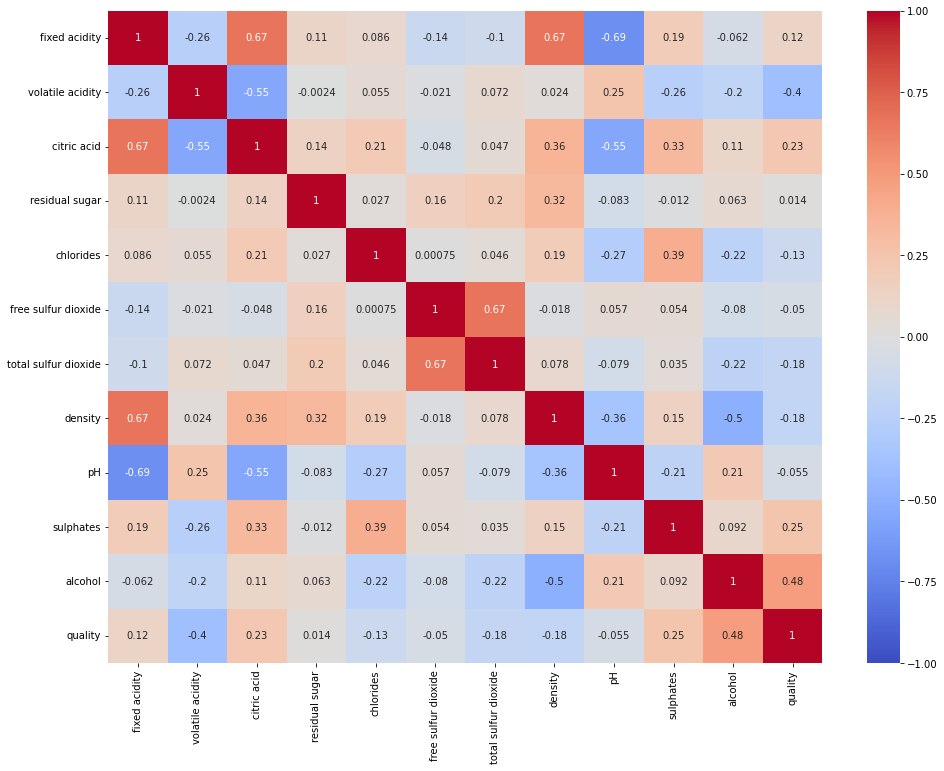

In [26]:
# Having a look at the correlation matrix
plt.figure(figsize=(16,12))
mask = np.zeros_like(wine_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#sns.heatmap(data=wine_data.corr(), cmap="coolwarm", annot=True,linewidths=1, linecolor='white',mask=mask,vmin=-1,vmax=+1)
sns.heatmap(data=wine_data.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

There are high correlation between the features
Fixed acidity is having high correlation with PH,density,and citric acid and the relationship is vice versa.
Alcohol is having high correlation with quality and density and the relationship is vice versa.
Overall Summary.
Below features have statistically significant relationship with wine quality:
Volatile Acidity.
Citric Acid.
Chlorides.
Density.
Sulphates.
Alcohol.
Below features does not  have statistically significant relationship with wine quality.
Fixed Acidity.
Residual Sugar.
Free Sulfur Dioxide.
Total Sulfur Dioxide.
PH

# 6: Data Preprocessing

In [27]:
wine_data['quality_status'] = np.where(wine_data['quality'] > 6, 'Good' , 'Bad')
wine_data['quality_status'].unique()

array(['Bad', 'Good'], dtype=object)

In [28]:
wine_data['quality_status'].value_counts()

Bad     1175
Good     184
Name: quality_status, dtype: int64

                           Target Variable Distribution                          


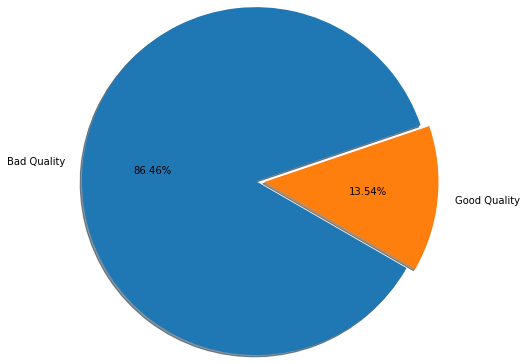

In [29]:
labels = ['Bad Quality','Good Quality']
explode=np.zeros(len(labels))
explode[-1]=0.1
# Representing the pie chart using Pie Chart
print('\033[1mTarget Variable Distribution'.center(85))
plt.pie(wine_data['quality_status'].value_counts(), labels=labels, counterclock=False, shadow=True,explode=explode, autopct='%1.2f%%', radius=2, startangle=-30)
plt.show()

The dataset distribution shows high level of bad quality wine and low level of good quality wine

In [31]:
wine_data["quality"] = wine_data["quality_status"].replace({"Bad":0,"Good":1}) # encoding the wine Quality 0: Bad, 1:Good
wine_data.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_status
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,Bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,Bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,Bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,Bad
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0,Bad
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0,Bad
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1,Good
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1,Good
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0,Bad
10,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,0,Bad


In [32]:
# Droping qualities and quality_status
wine_data=wine_data.drop(['quality_status'],axis=1)


In [33]:
# Separating feature data and Label data
X = wine_data.drop(['quality'],axis=1)
y = wine_data['quality']

In [34]:
# Standardizing the dataset for X
from sklearn.preprocessing import StandardScaler
stdscalar= StandardScaler()
X_Scalar= stdscalar.fit_transform(X)
X_Scalar

array([[-0.52443096,  0.93200015, -1.39325797, ...,  1.29187216,
        -0.57856134, -0.95437429],
       [-0.29406274,  1.91580043, -1.39325797, ..., -0.70839548,
         0.12482157, -0.5845748 ],
       [-0.29406274,  1.25993358, -1.18861732, ..., -0.32124691,
        -0.05102416, -0.5845748 ],
       ...,
       [-1.38831178,  0.11216658, -0.88165635, ...,  1.35639693,
         0.59374351,  0.7097234 ],
       [-1.38831178,  0.63139451, -0.77933603, ...,  1.67902074,
         0.3006673 , -0.21477532],
       [-1.33071973, -1.19956712,  1.01126962, ...,  0.51757501,
         0.00759108,  0.52482366]])

In [35]:
#  train-test splitSplit data into training and testing sets with test_size=0.20 and training_size=0.80
X_train, X_test, y_train, y_test = train_test_split(X_Scalar, y, test_size = 0.20,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1087, 11), (272, 11), (1087,), (272,))

# 7: Predictive Modelling using various algorithms

Logistic Regression

In [36]:
lreg=LogisticRegression(multi_class='multinomial',solver='newton-cg')

In [37]:
lreg.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [38]:
lreg.fit(X_train,y_train)
y_test_pred=lreg.predict(X_test)
y_train_pred=lreg.predict(X_train)
y_train_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
#pred_prob=lreg.predict_prob(X_test)
LR_testing=round(lreg.score(X_train, y_train)*100,2)
LR_training=round(lreg.score(X_test, y_test)*100,2)
print("Accuracy Score of Testing Data is =>",LR_testing,"%","&   ", "Accuracy Score of Training Data is =>", LR_training,"%")

Accuracy Score of Testing Data is => 87.58 % &    Accuracy Score of Training Data is => 89.34 %


In [43]:
# Model Accuracy
lr=metrics.accuracy_score(y_test, y_test_pred)*100
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred)*100)
print('\n')
print("Error rate:",(1-metrics.accuracy_score(y_test,y_test_pred))*100)
print('\n')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_test_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_test_pred))
print('\n')

Accuracy: 89.33823529411765


Error rate: 10.661764705882348


=== Confusion Matrix ===
[[230   8]
 [ 21  13]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       238
           1       0.62      0.38      0.47        34

    accuracy                           0.89       272
   macro avg       0.77      0.67      0.71       272
weighted avg       0.88      0.89      0.88       272





Decisoin Tree Classfier

In [44]:
# Fit model on Iris Daatset
from sklearn import tree
DT=tree.DecisionTreeClassifier(criterion='entropy',max_depth=9, max_features='sqrt',
                       min_samples_leaf=7, random_state=42, splitter='random')
DT.fit(X_train,y_train)
y_pred=DT.predict(X_test)
y_pred


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [45]:
DTC_testing=np.round(DT.score(X_train, y_train)*100,2)
DTC_training=np.round(DT.score(X_test, y_test)*100,2)
print("Accuracy Score of Testing Data is =>",DTC_testing,"%","&   ", "Accuracy Score of Training Data is =>", DTC_training,"%")

Accuracy Score of Testing Data is => 86.29 % &    Accuracy Score of Training Data is => 87.87 %


In [46]:
# Decision Tree Model Accuracy
DTM=metrics.accuracy_score(y_test, y_pred)*100
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
print('\n')
print("Error rate:",(1-metrics.accuracy_score(y_test,y_pred))*100)
print('\n')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')

Accuracy: 87.86764705882352


Error rate: 12.132352941176471


=== Confusion Matrix ===
[[238   0]
 [ 33   1]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       238
           1       1.00      0.03      0.06        34

    accuracy                           0.88       272
   macro avg       0.94      0.51      0.50       272
weighted avg       0.89      0.88      0.83       272





[Text(0.7376994680851063, 0.95, 'pH <= -2.206\nentropy = 0.579\nsamples = 1087\nvalue = [937, 150]\nclass = 0'),
 Text(0.7164228723404256, 0.85, 'entropy = 0.75\nsamples = 14\nvalue = [11, 3]\nclass = 0'),
 Text(0.7589760638297872, 0.85, 'volatile acidity <= 0.406\nentropy = 0.576\nsamples = 1073\nvalue = [926, 147]\nclass = 0'),
 Text(0.581781914893617, 0.75, 'volatile acidity <= 0.105\nentropy = 0.683\nsamples = 739\nvalue = [605, 134]\nclass = 0'),
 Text(0.46143617021276595, 0.65, 'alcohol <= 2.47\nentropy = 0.734\nsamples = 596\nvalue = [473, 123]\nclass = 0'),
 Text(0.3696808510638298, 0.55, 'residual sugar <= -0.177\nentropy = 0.722\nsamples = 580\nvalue = [464, 116]\nclass = 0'),
 Text(0.25, 0.45, 'total sulfur dioxide <= -0.572\nentropy = 0.64\nsamples = 308\nvalue = [258, 50]\nclass = 0'),
 Text(0.13829787234042554, 0.35, 'alcohol <= 0.14\nentropy = 0.734\nsamples = 136\nvalue = [108, 28]\nclass = 0'),
 Text(0.0851063829787234, 0.25, 'volatile acidity <= -0.752\nentropy = 0.43

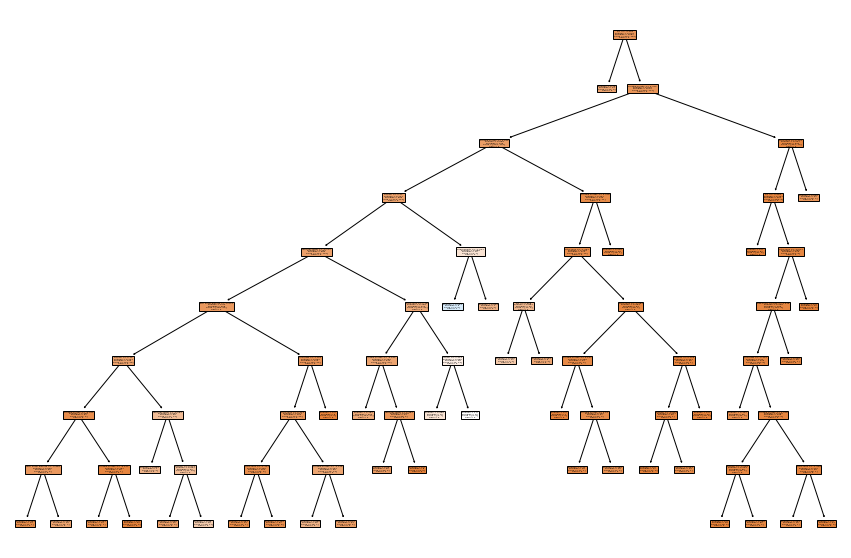

In [47]:
feature_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
plt.figure(figsize = (15,10))
#fn = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']
cn = ['0','1']
tree.plot_tree(DT,feature_names = feature_cols, class_names = cn, filled = True)

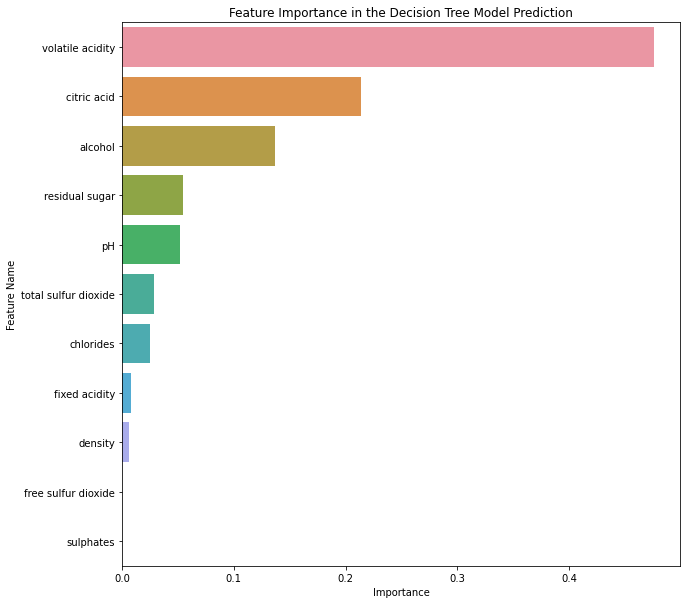

In [48]:
imp_df = pd.DataFrame({"Feature Name":X.columns,"Importance":DT.feature_importances_})
features = imp_df.sort_values(by="Importance",ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(x="Importance", y="Feature Name", data=features)
plt.title("Feature Importance in the Decision Tree Model Prediction")
plt.yticks(size=10)
plt.show()

The key factors that influenced the quality of wine are Volatile acidity,citric acid and alcohol.
And sulphates, free sulfur oxide, density have zero or less influence on quality of wine

Random Forest

In [49]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [50]:
y_pred = rf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [51]:
rf_testing=np.round(rf.score(X_train, y_train)*100,2)
rf_training=np.round(rf.score(X_test, y_test)*100,2)
print("Accuracy Score of Testing Data is =>",rf_testing,"%","&   ", "Accuracy Score of Training Data is =>", rf_training,"%")

Accuracy Score of Testing Data is => 100.0 % &    Accuracy Score of Training Data is => 90.81 %


In [52]:
conda install python-graphviz

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\ayoba\anaconda3

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1v             |       h2bbff1b_0         5.5 MB
    ------------------------------------------------------------
                                           Total:         5.5 MB

The following packages will be UPDATED:

  openssl                                 1.1.1u-h2bbff1b_0 --> 1.1.1v-h2bbff1b_0 




openssl-1.1.1v       | 5.5 MB    |            |   0% 
openssl-1.1.1v       | 5.5 MB    |            |   0% 
openssl-1.1.1v       | 5.5 MB    | 3          |   3% 
openssl-1.1.1v       | 5.5 MB    | 9          |   9% 
openssl-1.1.1v       | 5.5 MB    | #3         |  13% 
openssl-1.1.1v       | 5.5 MB    | ##4        |  24% 
openssl-1

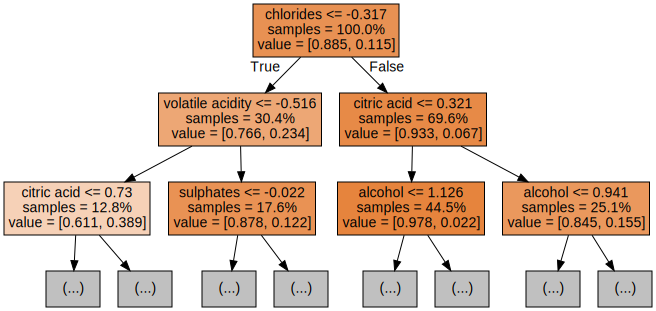

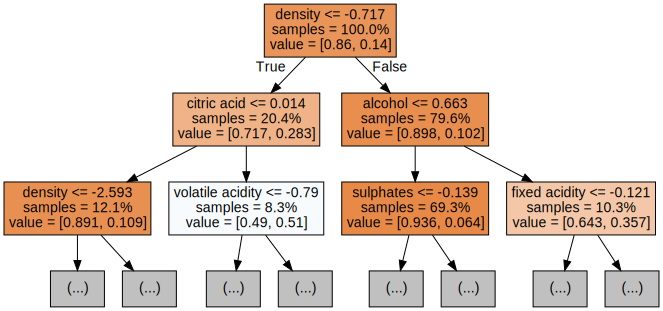

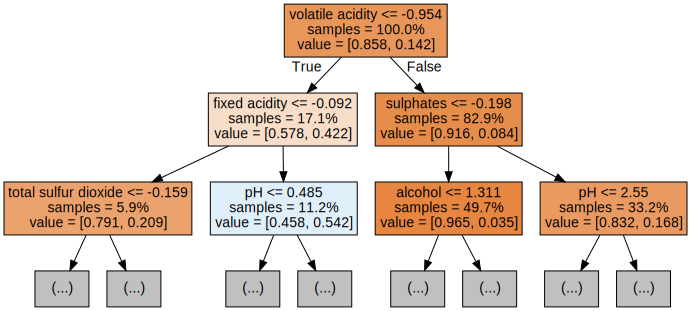

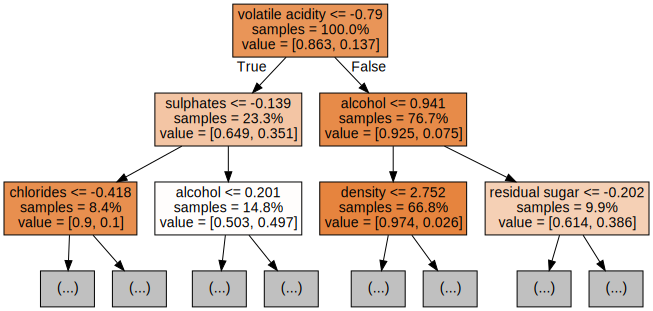

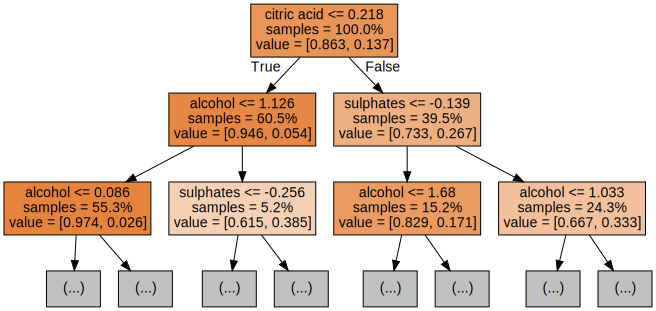

In [53]:
import graphviz
feature_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
for i in range(5):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=feature_cols,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

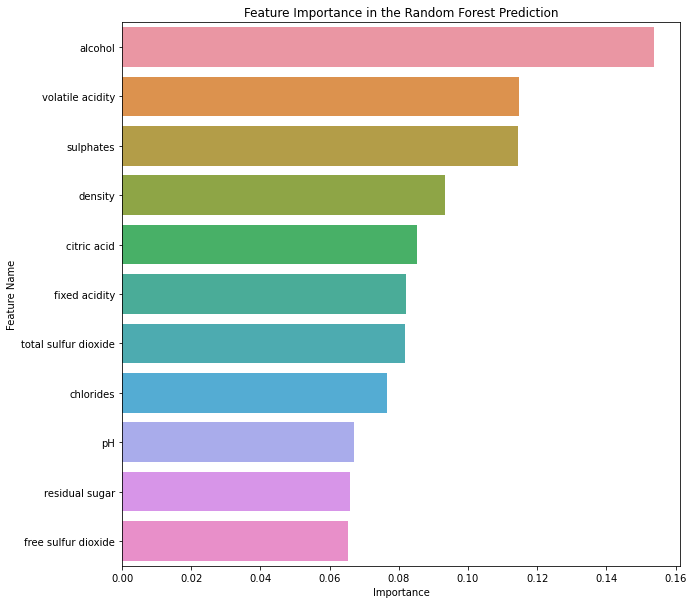

In [54]:
imp_df = pd.DataFrame({"Feature Name":X.columns,"Importance":rf.feature_importances_})
features = imp_df.sort_values(by="Importance",ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(x="Importance", y="Feature Name", data=features)
plt.title("Feature Importance in the Random Forest Prediction")
plt.yticks(size=10)
plt.show()

The key factors that influenced the quality of wine are Volatile acidity,citric acid and alcohol.
And sulphates, free sulfur oxide, density have zero or less influence on quality of wine

In [55]:
# Decision Tree Model Accuracy
rfc=metrics.accuracy_score(y_test, y_pred)*100
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
print('\n')
print("Error rate:",(1-metrics.accuracy_score(y_test,y_pred))*100)
print('\n')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')

Accuracy: 90.80882352941177


Error rate: 9.191176470588236


=== Confusion Matrix ===
[[234   4]
 [ 21  13]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       238
           1       0.76      0.38      0.51        34

    accuracy                           0.91       272
   macro avg       0.84      0.68      0.73       272
weighted avg       0.90      0.91      0.89       272





# 8: Comparing the models and Model Evaluation

In [56]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center',fontweight="black",fontsize='22')

C:\Users\ayoba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


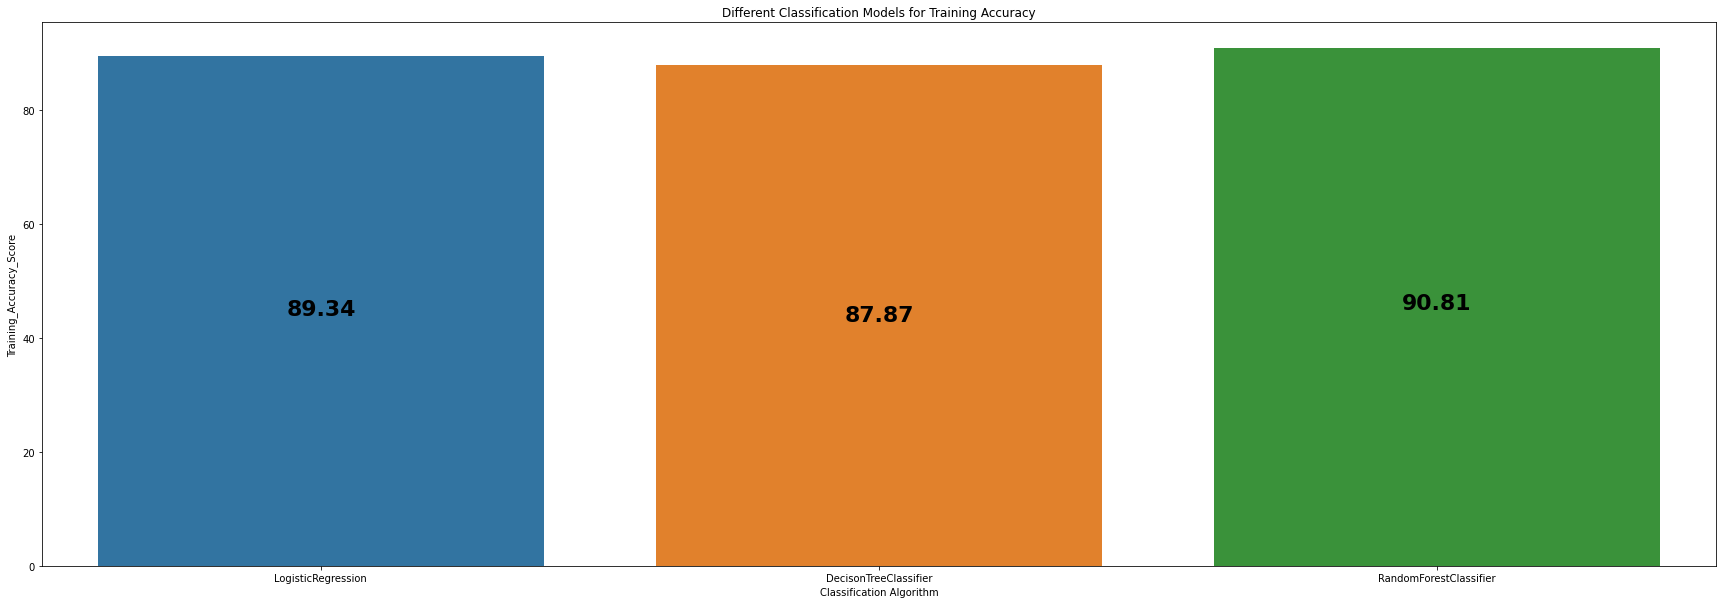

In [57]:
# Comparing the algorithms for Training dataset
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
x= ['LogisticRegression','DecisonTreeClassifier','RandomForestClassifier']
y=  [LR_training,DTC_training,rf_training]
plt.figure(figsize = (30,10))
sns.barplot(x,y)

# calling the function to add value labels
addlabels(x, y)

# Add labels to your graph
plt.xlabel('Classification Algorithm')
plt.ylabel('Training_Accuracy_Score')
plt.title("Different Classification Models for Training Accuracy")

#plt.legend()
plt.show()

C:\Users\ayoba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


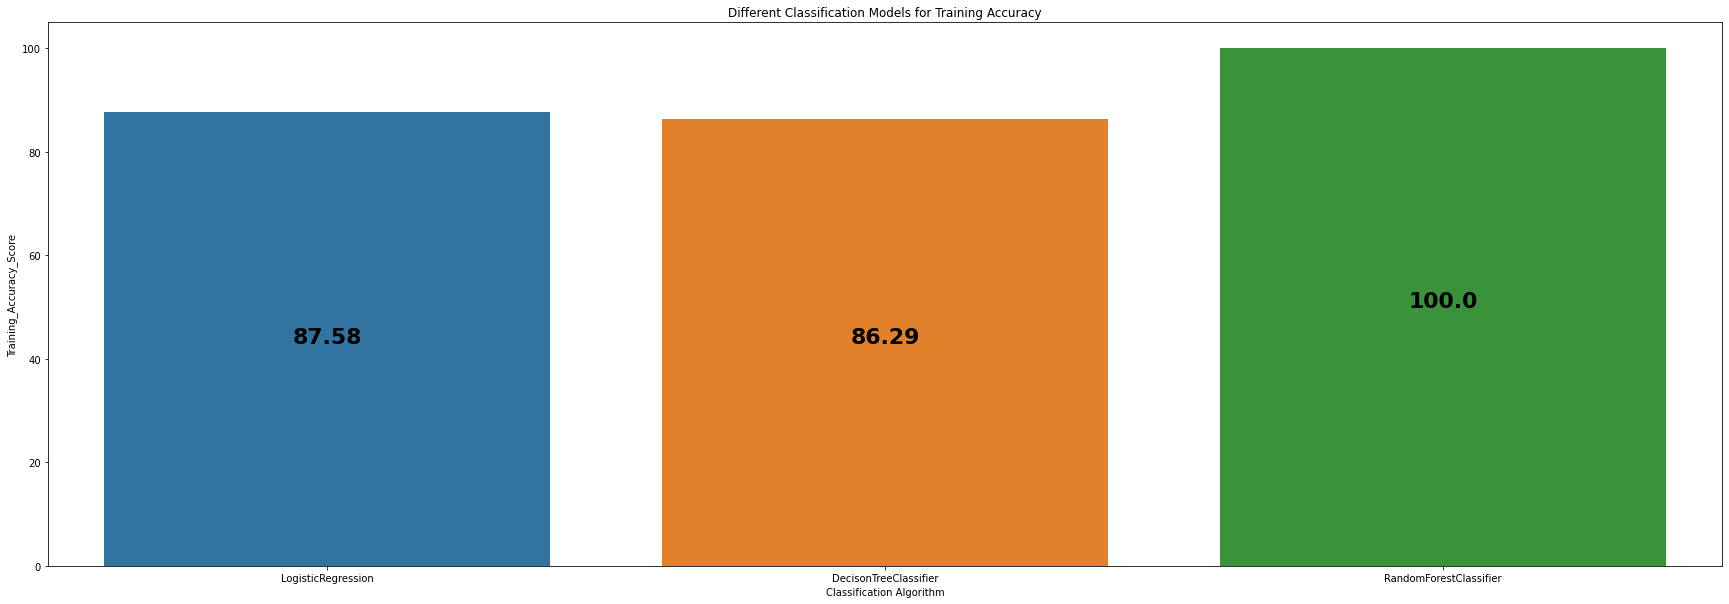

In [58]:
# Comparing the algorithms for Testing dataset
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
x= ['LogisticRegression','DecisonTreeClassifier','RandomForestClassifier']
y=  [LR_testing,DTC_testing,rf_testing]
plt.figure(figsize = (30,10))
sns.barplot(x,y)

# calling the function to add value labels
addlabels(x, y)

# Add labels to your graph
plt.xlabel('Classification Algorithm')
plt.ylabel('Training_Accuracy_Score')
plt.title("Different Classification Models for Training Accuracy")

#plt.legend()
plt.show()

ROC Curve and Area Under the Curve (AUC) for Decision Tree

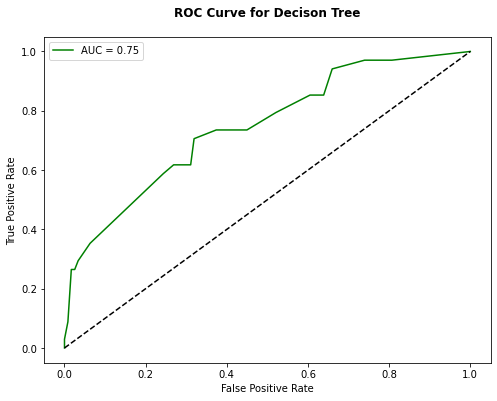

In [63]:
y_pred_proba = DT.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_proba)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Decison Tree",pad=20,fontweight="black")
plt.legend()
plt.show()

AUC is 0.75, it means there is a 75% chance that the model will be able to distinguish between positive class and negative class.
Thus it is effective in making accurate predictions

ROC Curve and Area Under the Curve (AUC) for Rain Forest

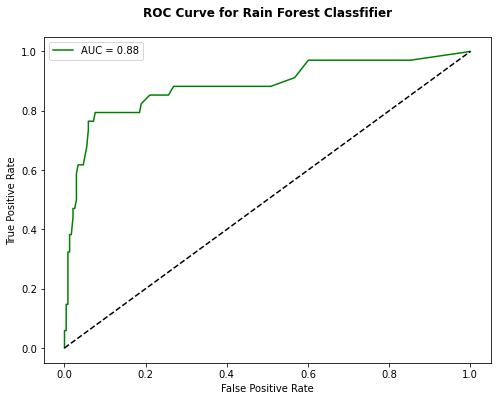

In [62]:
y_pred_proba = rf.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_proba)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Rain Forest Classfifier",pad=20,fontweight="black")
plt.legend()
plt.show()

AUC is 0.88, it means there is a 88% chance that the model will be able to distinguish between positive class and negative class.
Thus it is effective in making accurate predictions

Key-Findings:

The key factors that significantly influence the wine quality are Alcohol, Sulphates and Volatilee Acidity.
The minimal impact of features on the wine quality are Free Sulfur Dioxide and pH.
High Training and Testing Accuracies:All the three models achieved an average score near to 90% on the training data, indicating a good fit to the training instances. Additionally, the model's accuracy score near to 87% on the testing data.

High F1 Score, Recall, and Precision: The model achieved high F1 score, recall, and precision values. This indicates that the model has a strong ability to correctly identify positive cases while minimizing false positives and maximizing true positives.
High AUC value more than 0.88 and 0.75, states that the model demonstrates a reasonably good discriminatory power. It suggests that the model is able to distinguish between positive and negative instances with a relatively high degree of accuracy.

Overall Model Performance: The model demonstrates strong performance across multiple evaluation metrics, indicating its effectiveness in making accurate predictions and capturing the desired outcomes.

Key-Suggestions:

Key Quality Drivers: Prioritize Alcohol, Citric acid, and Volatile Acidity as they significantly influence wine quality.

Continuous Improvement: Continuously monitor customer feedback and wine ratings to identify areas for improvement and enhance overall product quality.